In [1]:
import xarray as xr
import matplotlib.pyplot as plt

import common

In [2]:
online_ds = xr.open_dataset("fig_data/online_1yr_run_zonal_2d.nc")
offline_ds = xr.open_dataset("fig_data/offline_1yr_run_zonal_2d.nc")

In [3]:
offline_ds["total_precipitation"].attrs.update({"long_name": "Surface precipitation", "units": "mm/day"})
offline_ds["cloud_water_mixing_ratio"].attrs.update({"long_name": "Column integrated cloud water", "units": "kg/m^2"})

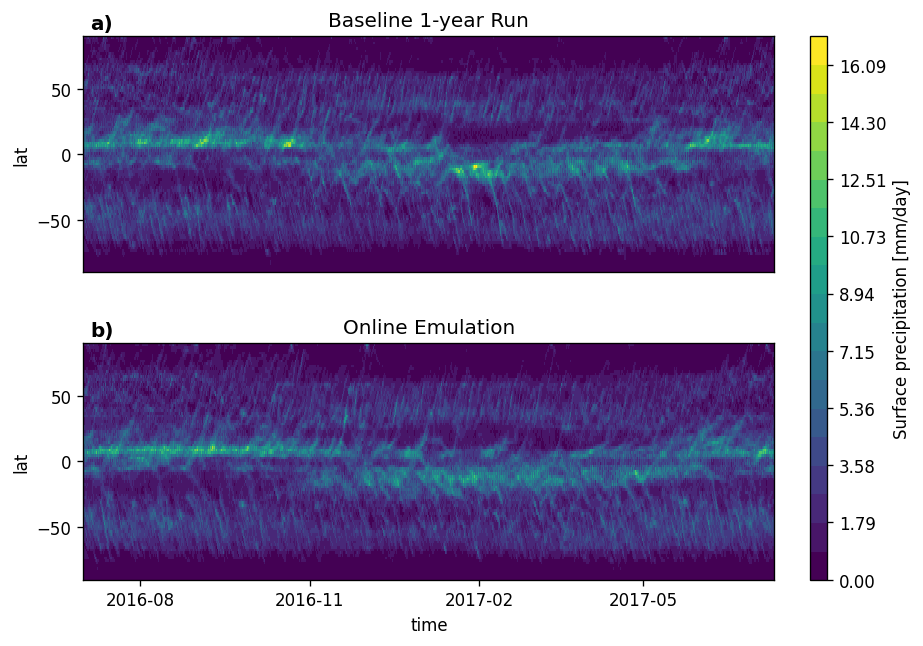

In [4]:

fig = plt.figure(dpi=120, figsize=(8, 6))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[40, 1], hspace=0.3, wspace=0.1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
cbar_ax = fig.add_subplot(gs[0:2, 1])

k = "total_precipitation"
offline_v = offline_ds[k]
online_v = online_ds[k]
vmin = min(online_v.min(), offline_v.min())
vmax = max(online_v.max(), offline_v.max())

offline_v.plot(x="time", ax=ax1, vmin=vmin, vmax=vmax, levels=20, xticks=[0], add_colorbar=False, rasterized=True)
ax1.set_title("Baseline 1-year Run")
ax1.text(0.01, 1.03, "a)", fontdict=dict(size=12, weight="bold"), transform=ax1.transAxes)
ax1.set_xlabel("")
online_v.plot(x="time", ax=ax2, vmin=vmin, vmax=vmax, levels=20, cbar_ax=cbar_ax, 
              cbar_kwargs=dict(label="Surface precipitation [mm/day]"), rasterized=True)
ax2.set_title("Online Emulation")
ax2.text(0.01, 1.03, "b)", fontdict=dict(size=12, weight="bold"), transform=ax2.transAxes)
common.savefig("sfc_pr_hoev_horizontal")
plt.show()

In [4]:
online_ds = xr.open_dataset("fig_data/online_1yr_run_zonal_3d_avg.nc")
offline_ds = xr.open_dataset("fig_data/offline_1yr_run_zonal_3d_avg.nc")

In [5]:
units = {
    "cloud_water_mixing_ratio": "mg/kg",
    "air_temperature": "K",
    "specific_humidity": "g/kg",
    "total_precipitation": "",
    "relative_humidity": "Relative humidity"
}

scale_factors = {
    "cloud_water_mixing_ratio": 1e6,
    "specific_humidity": 1e3,
}

simple_name = {
    "cloud_water_mixing_ratio": "cloud water",
    "air_temperature": "air temperature",
    "specific_humidity": "specific humidity",
}

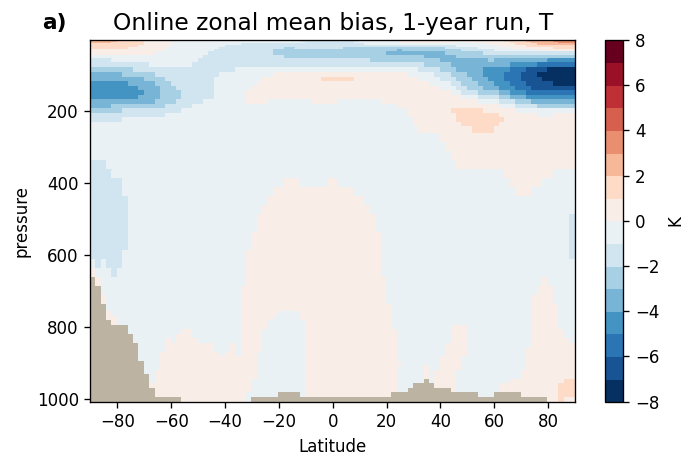

In [7]:
fix, ax = plt.subplots(dpi=120, figsize=(6,4))
key = "air_temperature"
unit_label = units[key]

kwargs = dict(y="pressure", yincrease=False, levels=20, cbar_kwargs=dict(label=unit_label), rasterized=True, cmap=common.RdBu_LAND)

diff = (online_ds - offline_ds)
diff["pressure"] = diff["pressure"] / 100 # to hPa
diff[key].plot(ax=ax, **kwargs)

ax.text(-0.1, 1.03, "a)", fontdict=dict(size=13, weight="bold"), transform=ax.transAxes)

ax.set_title("Online zonal mean bias, 1-year run, T", size=14)
ax.set_xlabel("Latitude")
plt.tight_layout()
common.savefig("zonal_mean_1year_bias_T")
plt.show()


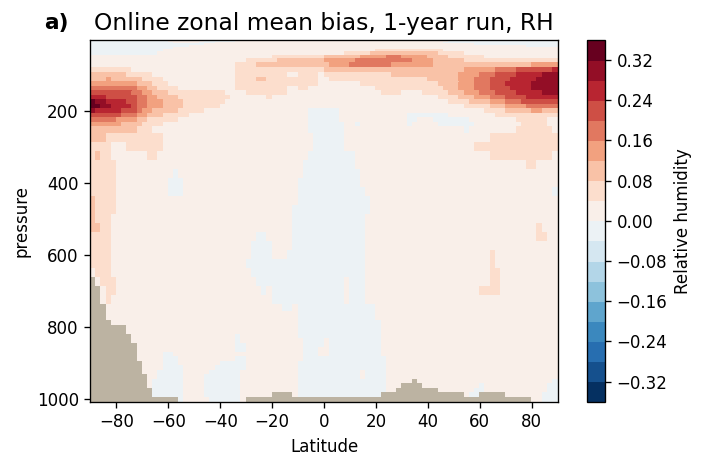

In [11]:
fix, ax = plt.subplots(dpi=120, figsize=(6,4))
key = "relative_humidity"
unit_label = units[key]

kwargs = dict(y="pressure", yincrease=False, levels=20, cbar_kwargs=dict(label=unit_label), rasterized=True, cmap=common.RdBu_LAND)

diff = (online_ds - offline_ds)
diff["pressure"] = diff["pressure"] / 100 # to hPa
diff[key].plot(ax=ax, **kwargs)

ax.text(-0.1, 1.03, "a)", fontdict=dict(size=13, weight="bold"), transform=ax.transAxes)

ax.set_title("Online zonal mean bias, 1-year run, RH", size=14)
ax.set_xlabel("Latitude")
plt.tight_layout()
common.savefig("zonal_mean_1year_bias_T")
plt.show()


## Combined 

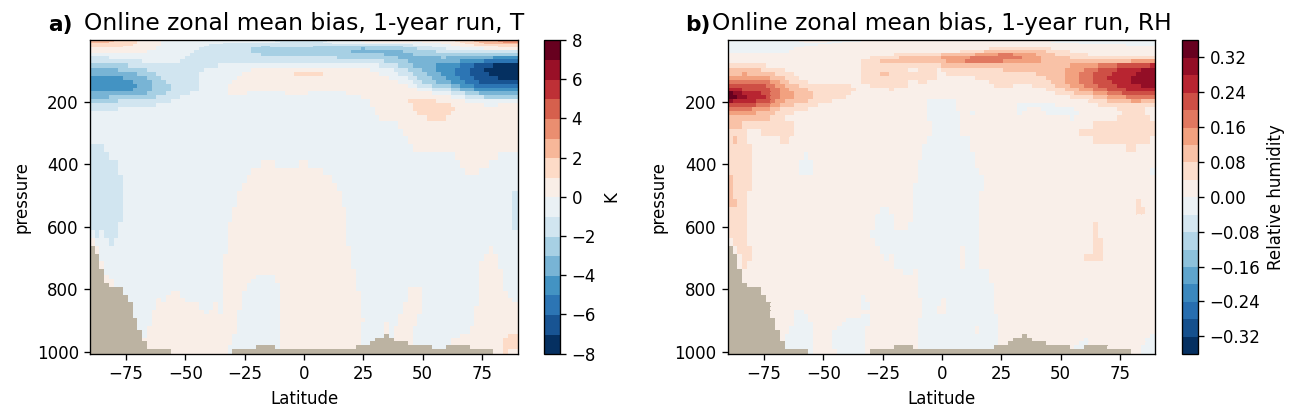

In [13]:
fix, axs = plt.subplots(1, 2, dpi=120, figsize=(11, 3.6))
key = "air_temperature"
unit_label = units[key]

kwargs = dict(y="pressure", yincrease=False, levels=20, cbar_kwargs=dict(label=unit_label), rasterized=True, cmap=common.RdBu_LAND)

ax = axs[0]
diff = (online_ds - offline_ds)
diff["pressure"] = diff["pressure"] / 100 # to hPa
diff[key].plot(ax=ax, **kwargs)

ax.text(-0.1, 1.03, "a)", fontdict=dict(size=13, weight="bold"), transform=ax.transAxes)

ax.set_title("Online zonal mean bias, 1-year run, T", size=14)
ax.set_xlabel("Latitude")

ax = axs[1]
key = "relative_humidity"
unit_label = units[key]

kwargs = dict(y="pressure", yincrease=False, levels=20, cbar_kwargs=dict(label=unit_label), rasterized=True, cmap=common.RdBu_LAND)

diff = (online_ds - offline_ds)
diff["pressure"] = diff["pressure"] / 100 # to hPa
diff[key].plot(ax=ax, **kwargs)

ax.text(-0.1, 1.03, "b)", fontdict=dict(size=13, weight="bold"), transform=ax.transAxes)

ax.set_title("Online zonal mean bias, 1-year run, RH", size=14)
ax.set_xlabel("Latitude")
plt.tight_layout()
common.savefig("zonal_mean_1year_combined")
plt.show()

